# Discovering Dynamic Patterns from Coronavirus Data using Dynamic Mode Decomposition with Control: US State Data

## Import Data

In [265]:
# package imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from pydmd import DMD
from datetime import timedelta, date, datetime
import re 

In [266]:
# import csse_covid_19_daily_reports

# create data frame:
# list of states
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]


statesA = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]


In [267]:
# add later date data

rowsum = pd.DataFrame()
stateData = pd.DataFrame()

In [268]:
start_date = date(2020, 1, 22)
end_date = date(2020, 2, 1)

for single_date in daterange(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if totalInState.empty == False:
            title = title.iloc[[0],:]
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
    stateData = pd.concat([stateData,newStateData],axis=1)

In [269]:
start_date = date(2020, 2, 2)
end_date = date(2020, 3, 10)

for single_date in daterange(start_date, end_date):
    stateIter = iter(states)
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)

    for state in statesA:
        stateName = next(stateIter)
        totalInState = daily.loc[daily['Country/Region'] == 'US']
        totalInState = totalInState.loc[totalInState['Province/State'].str.contains(state)]
        if totalInState.empty == False:
            title = totalInState.loc[:,'Province/State':'Province/State']
            title = title.iloc[[0],:]
            title.at[:,'Province/State']= stateName
            title.update(new_df)
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
    stateData = pd.concat([stateData,newStateData],axis=1)

In [270]:
start_date = date(2020, 3, 11)
end_date = date(2020, 3, 21)

newStateData = pd.DataFrame()

for single_date in daterange(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province/State'] == state]
        title = totalInState.loc[:,'Province/State':'Province/State']
        if totalInState.empty == False:
            title = title.iloc[[0],:]
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    newStateData = newStateData.set_index('Province/State').drop(columns=['index'])
    stateData = pd.concat([stateData,newStateData],axis=1)

In [271]:
start_date = date(2020, 3, 22)
end_date = end_date = datetime.date(datetime.now())

newStateData = pd.DataFrame()

for single_date in daterange(start_date, end_date):
    newStateData = pd.DataFrame()
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ single_date.strftime("%m-%d-%Y") +'.csv'
    daily = pd.read_csv(url, error_bad_lines=False)
    for state in states:
        totalInState = daily.loc[daily['Province_State'] == state]
        title = totalInState.loc[:,'Province_State':'Province_State']
        if totalInState.empty == False:
            title = title.iloc[[0],:]
            rowSum = pd.DataFrame(totalInState.loc[:,'Confirmed':].sum())
            newStateData = pd.concat([newStateData,title.reset_index().join(rowSum.iloc[0].rename(single_date.strftime("%m-%d-%Y")))])
    newStateData = newStateData.set_index('Province_State').drop(columns=['index'])
    stateData = pd.concat([stateData,newStateData],axis=1)

In [272]:
stateData = stateData.fillna(0)
stateData

,01-22-2020,01-23-2020,01-24-2020,01-25-2020,01-26-2020,01-27-2020,01-28-2020,01-29-2020,01-30-2020,01-31-2020,...,03-19-2020,03-20-2020,03-22-2020,03-23-2020,03-24-2020,03-25-2020,03-26-2020,03-27-2020,03-28-2020,03-29-2020
Washington,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1376.0,1524.0,1997,2221,2328,2591,3207,3477,4030,4465
Illinois,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,422.0,585.0,1049,1285,1537,1865,2538,3024,3491,4596
Arizona,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,45.0,78.0,152,235,326,401,508,665,773,919
California,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,952.0,1177.0,1646,2108,2538,2998,3899,4657,5095,5852
Massachusetts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,328.0,413.0,646,777,1159,1838,2417,3240,4257,4955
Wisconsin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,159.0,207.0,381,425,481,621,728,926,1055,1164
Texas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,260.0,394.0,643,758,955,1229,1563,1937,2455,2792
Nebraska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,37.0,51,51,66,71,74,82,96,108
Oregon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,88.0,114.0,161,191,210,266,316,416,479,548
Rhode Island,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,54.0,83,106,124,132,165,203,239,294


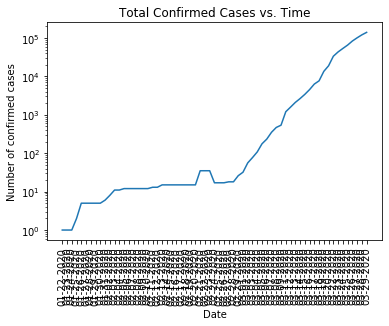

In [273]:
# plot confirmed cases vs. time
plt.title('Total Confirmed Cases vs. Time')

plt.plot(stateData.loc[:,'01-22-2020':].sum())

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

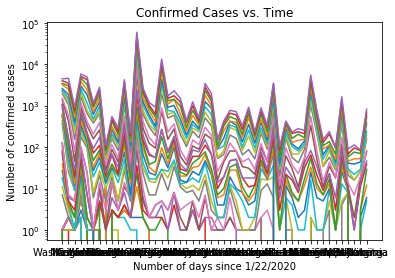

In [274]:
# plot confirmed cases vs. time
plt.title('Confirmed Cases vs. Time')

plt.plot(stateData.loc[:,'01-22-2020':])

plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')

plt.show()

## Normalize each location’s time series to account for larger population centers

subtract mean from time series and set variance to one

In [275]:
idx = pd.IndexSlice

# confirmed cases normalized
data = stateData.loc[:,'01-22-2020':] # select all date ranges
scaledDataConfirmed = preprocessing.scale(data) # Scaled data has zero mean and unit variance

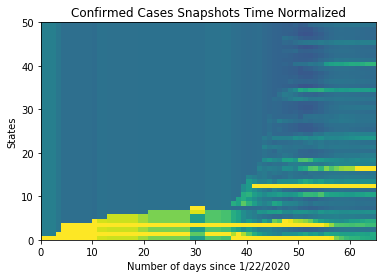

In [276]:
# plot normalized data snapshots
plt.title('Confirmed Cases Snapshots Time Normalized')
plt.pcolor(scaledDataConfirmed, vmin=-1, vmax=1)
plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('States')
plt.show()

## Take DMD

In [277]:
dmd = DMD()
dmd.fit(scaledDataConfirmed.T)


Eigenvalue (0.7317835734554761+0.15515936608599692j): distance from unit circle 0.4404183727365255
Eigenvalue (0.7317835734554761-0.15515936608599692j): distance from unit circle 0.4404183727365255
Eigenvalue (0.6006713708003588+0.20484150229908657j): distance from unit circle 0.5972338632366712
Eigenvalue (0.6006713708003588-0.20484150229908657j): distance from unit circle 0.5972338632366712
Eigenvalue (0.4442510695364025+0.41254691985871145j): distance from unit circle 0.6324460261308524
Eigenvalue (0.4442510695364025-0.41254691985871145j): distance from unit circle 0.6324460261308524
Eigenvalue (0.17544941600076014+0.5584644739917268j): distance from unit circle 0.6573349337141361
Eigenvalue (0.17544941600076014-0.5584644739917268j): distance from unit circle 0.6573349337141361
Eigenvalue (-0.0715902972205813+0.5639376139713536j): distance from unit circle 0.6768491968921655
Eigenvalue (-0.0715902972205813-0.5639376139713536j): distance from unit circle 0.6768491968921655
Eigenvalue

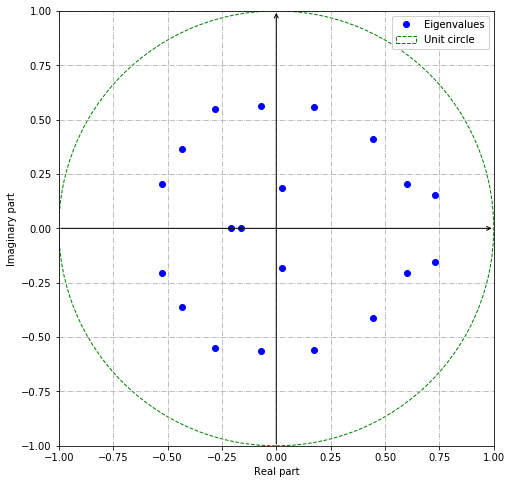

In [278]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

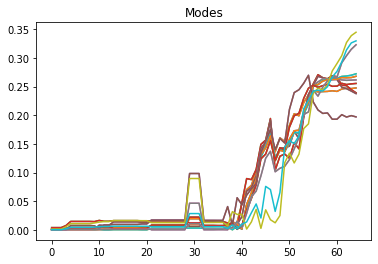

In [279]:
# modes for each date and country
for mode in dmd.modes.T:
    plt.plot(abs(mode.real))
    plt.title('Modes')
plt.show()
